In [60]:
import pandas as pd
from sodapy import Socrata


client = Socrata("data.cdc.gov",None)
results = client.get("r8kw-7aab",limit=4000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
0,2020-06-17T00:00:00.000,2020-02-01T00:00:00.000,2020-02-01T00:00:00.000,By week,United States,Week-ending,1,57951,0.98,3751,0,476,4228,NaN
1,2020-06-17T00:00:00.000,2020-02-08T00:00:00.000,2020-02-08T00:00:00.000,By week,United States,Week-ending,1,58467,0.98,3734,0,514,4249,NaN
2,2020-06-17T00:00:00.000,2020-02-15T00:00:00.000,2020-02-15T00:00:00.000,By week,United States,Week-ending,0,57753,0.98,3758,0,545,4303,NaN
3,2020-06-17T00:00:00.000,2020-02-22T00:00:00.000,2020-02-22T00:00:00.000,By week,United States,Week-ending,4,57819,0.99,3634,1,557,4194,NaN
4,2020-06-17T00:00:00.000,2020-02-29T00:00:00.000,2020-02-29T00:00:00.000,By week,United States,Week-ending,5,58199,1.01,3757,3,637,4396,NaN


In [61]:
# results_df.columns

In [62]:
float_cols=['total_deaths', 'percent_of_expected_deaths', 'pneumonia_deaths','pneumonia_and_covid_deaths', 'influenza_deaths', 'pneumonia_influenza_or_covid_19_deaths']
date_cols=['data_as_of','start_week','end_week']
def transform_df(df,date_cols,float_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])
    for col in float_cols:
        df[col] = df[col].astype(float)
    return df.drop_duplicates(subset=['start_week','state','indicator'],keep='last').reset_index(drop=True)

results_df = pd.DataFrame.from_records(results).pipe(transform_df,date_cols,float_cols)

results_df.head()

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
0,2020-06-17,2020-02-01,2020-02-01,By week,United States,Week-ending,1,57951.0,0.98,3751.0,0.0,476.0,4228.0,NaN
1,2020-06-17,2020-02-08,2020-02-08,By week,United States,Week-ending,1,58467.0,0.98,3734.0,0.0,514.0,4249.0,NaN
2,2020-06-17,2020-02-15,2020-02-15,By week,United States,Week-ending,0,57753.0,0.98,3758.0,0.0,545.0,4303.0,NaN
3,2020-06-17,2020-02-22,2020-02-22,By week,United States,Week-ending,4,57819.0,0.99,3634.0,1.0,557.0,4194.0,NaN
4,2020-06-17,2020-02-29,2020-02-29,By week,United States,Week-ending,5,58199.0,1.01,3757.0,3.0,637.0,4396.0,NaN


In [63]:
results_df.start_week.unique()

array(['2020-02-01T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-22T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-14T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-18T00:00:00.000000000',
       '2020-04-25T00:00:00.000000000', '2020-05-02T00:00:00.000000000',
       '2020-05-09T00:00:00.000000000', '2020-05-16T00:00:00.000000000',
       '2020-05-23T00:00:00.000000000', '2020-05-30T00:00:00.000000000',
       '2020-06-06T00:00:00.000000000', '2020-06-13T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [64]:
results_df['state'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x660d2d10>)

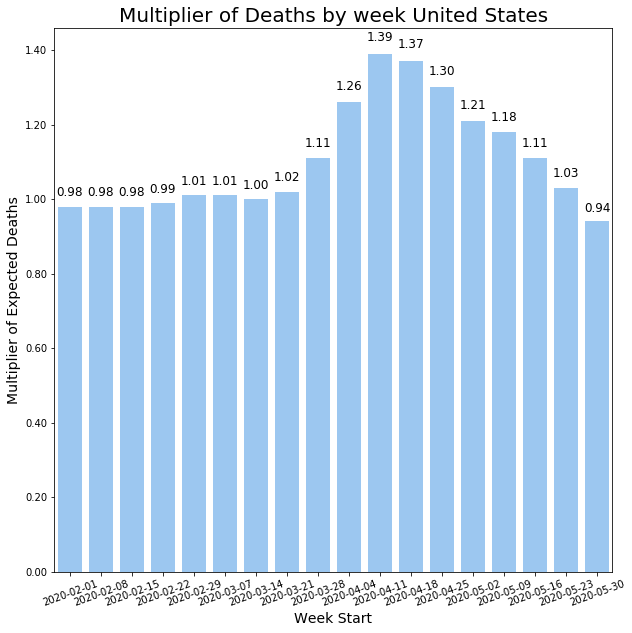

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
%matplotlib inline

def autolabel(rects, ax, loc = 1.02, perc = True, ha = 'center'):
    # attach some text labels

    for rect in rects:
        height = rect.get_height()
        if perc:
            bar_label = '%1.1f' % float(height*100) + "%"
        else:
            bar_label = '%1.2f' % float(height)
        ax.text(rect.get_x() + rect.get_width()/2., loc*height,
                bar_label,
                ha=ha, va='bottom', fontsize = 12)

def plot_death_bar(df,state='United States',with_multiplier='percent'):
    data = df[df['state']==state]
    fig,ax = plt.subplots(figsize=(10,10))
    if with_multiplier=='percent':
        formatter = FuncFormatter(lambda y, pos:"%d%%" % (y*100))
    else:
        formatter = FuncFormatter(lambda y, pos:"%.2f" % (y))
#     data['percent_of_expected_deaths']-=1
    sns.barplot(x='start_week',y='percent_of_expected_deaths',data=data,color='dodgerblue',alpha=.5)
#     ax.set_xticks(data['start_week'])
    percent = (with_multiplier=='percent')
    autolabel(ax.patches,ax,perc=percent)
    ax.xaxis.set_tick_params(rotation=20)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticklabels(data['start_week'].dt.strftime('%Y-%m-%d'))
    if with_multiplier=='percent':
        ax.set_title('Percent of Deaths by week {}'.format(state),fontsize=20)
        ax.set_ylabel('Percent of Expected Deaths',fontsize=14)
    else:
        ax.set_title('Multiplier of Deaths by week {}'.format(state),fontsize=20)
        ax.set_ylabel('Multiplier of Expected Deaths',fontsize=14)
    ax.set_xlabel("Week Start",fontsize=14)
    return fig,ax

def plot_death_line(df,state_list=[]):
    state_list = ['United States']+state_list
    data = df[df['state'].isin(state_list)]
    fig,ax = plt.subplots(figsize=(10,10))
    formatter = FuncFormatter(lambda y, pos:"%d%%" % (y*100))
    sns.lineplot(x='start_week',y='percent_of_expected_deaths',data=data,hue='state')
#     ax.set_xticks(data['start_week'])
#     autolabel(ax.patches,ax)
    ax.xaxis.set_tick_params(rotation=20)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticks(data['start_week'].drop_duplicates())
#     ax.set_xticklabels(data['start_week'].drop_duplicates().dt.strftime('%Y-%m-%d').iloc[::2])
#     ax.set_xticklabels(data['start_week'].dt.strftime('%Y-%m-%d'))
    ax.set_title('Percent of Deaths by week US',fontsize=20)
    ax.set_ylabel('Percent of Expected Deaths',fontsize=14)
    ax.set_xlabel("Week Start",fontsize=14)
    return fig,ax

plot_death_bar(results_df[results_df['start_week']<'2020-06-01'],with_multiplier='blue')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x660d0410>)

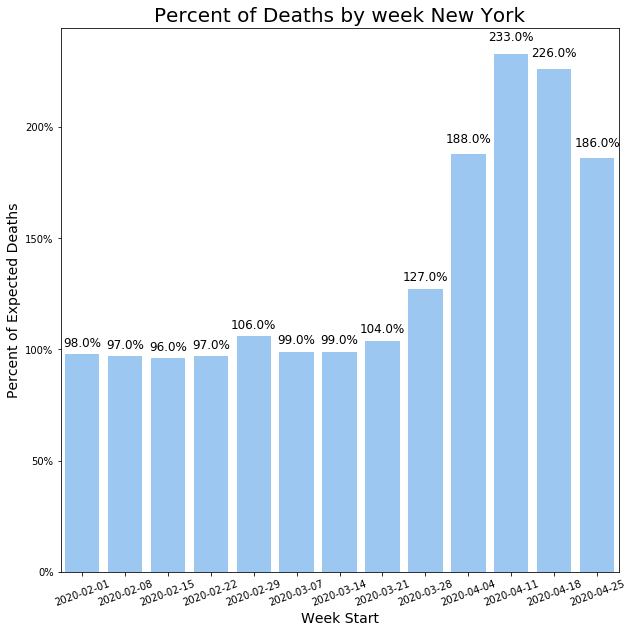

In [66]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New York')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x6ef464f0>)

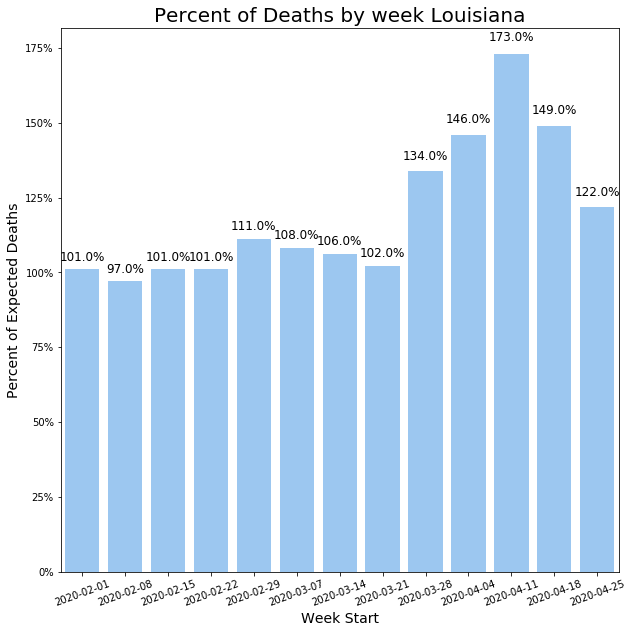

In [67]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Louisiana')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x6605f7f0>)

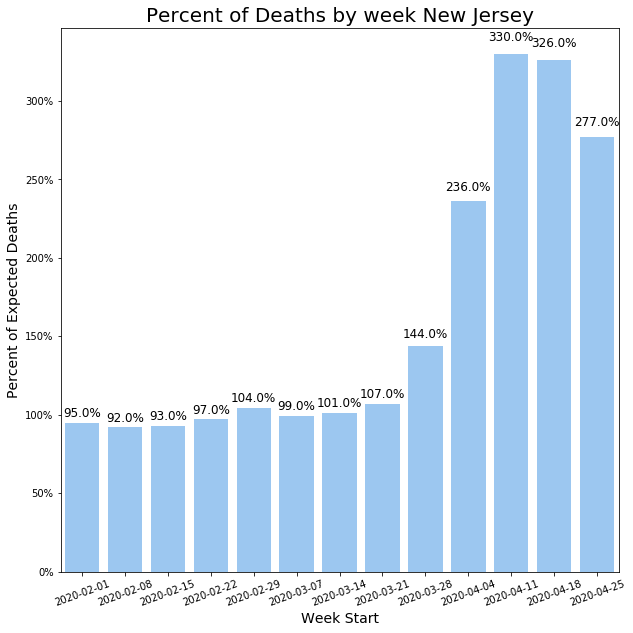

In [68]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New Jersey')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x6603b910>)

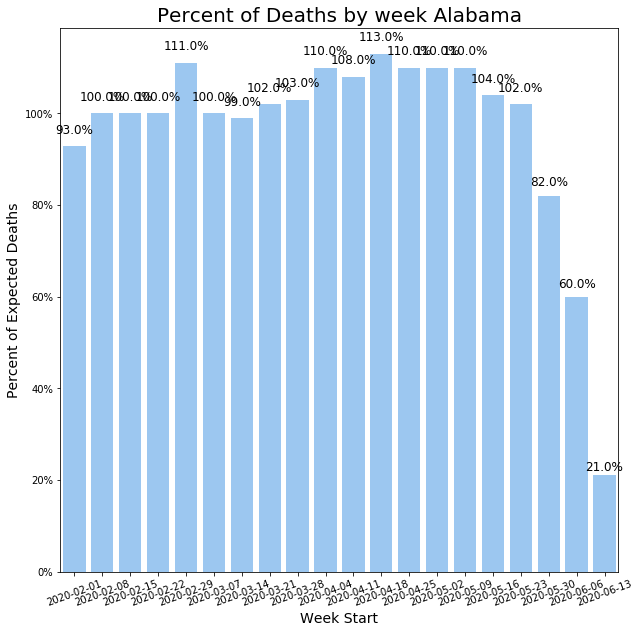

In [69]:
plot_death_bar(results_df,'Alabama')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x65a4a370>)

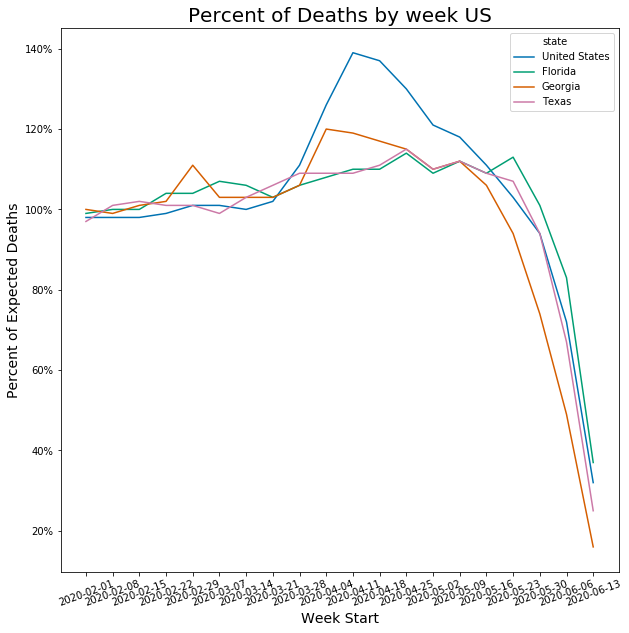

In [70]:
plot_death_line(results_df,['Florida','Georgia','Texas'])

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x65fc0dd0>)

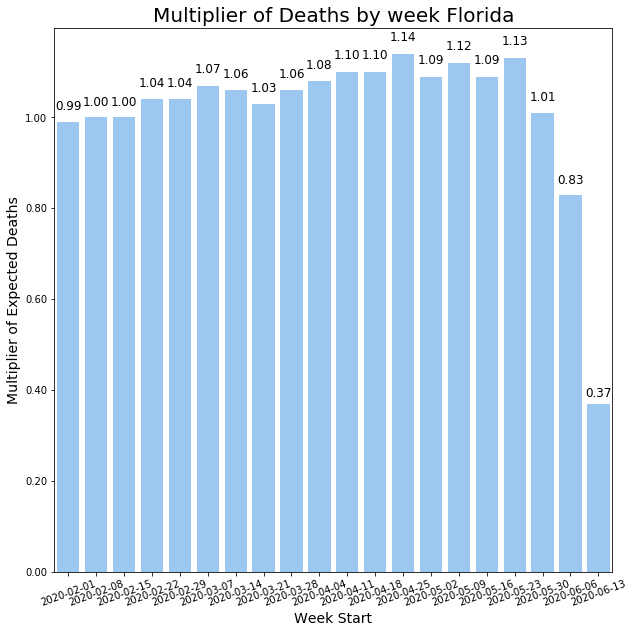

In [71]:
plot_death_bar(results_df,'Florida',with_multiplier='yes')

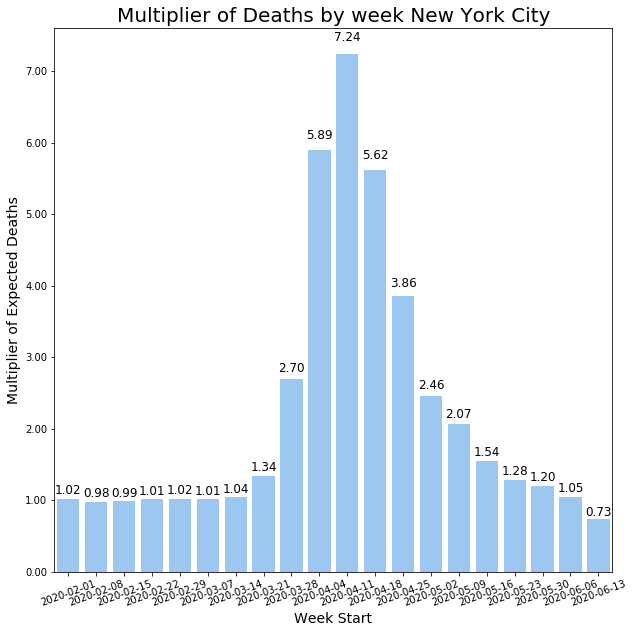

In [72]:
fig,ax = plot_death_bar(results_df,'New York City',with_multiplier='yes')
fig.savefig("weekly_deaths_nyc_multiplier2.png")

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x658158f0>)

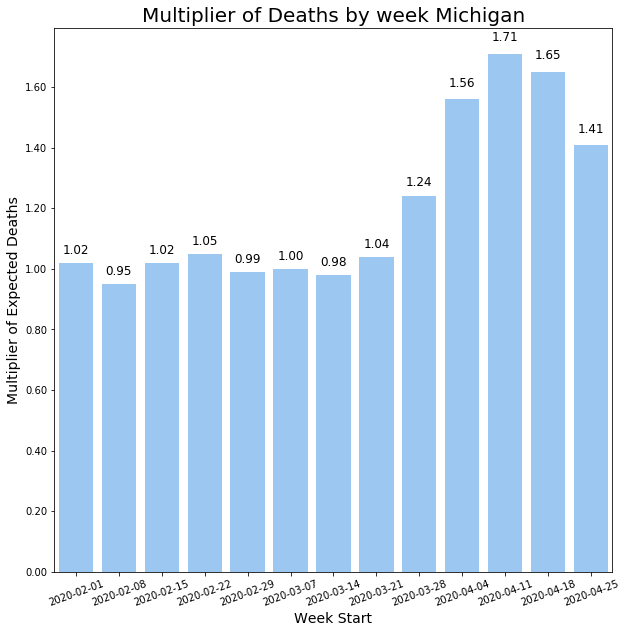

In [73]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Michigan',with_multiplier='yes')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x657fdc30>)

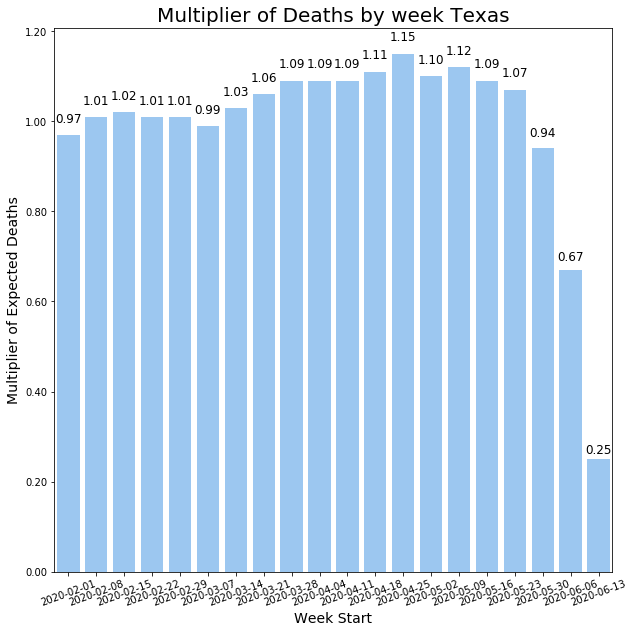

In [74]:
plot_death_bar(results_df,'Texas',with_multiplier='yes')

In [75]:
tx_df = results_df[results_df['state']=='Texas']


In [76]:
tx_df['expected_deaths'] = tx_df['total_deaths']/tx_df['percent_of_expected_deaths']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
tx_df['Deaths Over Expected'] = tx_df['total_deaths']-tx_df['expected_deaths']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
tx_df[(tx_df['start_week']<'2020-06-01')]['Deaths Over Expected'].sum()

3629.824930335568

In [79]:
tx_df.head(20)

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote,expected_deaths,Deaths Over Expected
900,2020-06-17,2020-02-01,2020-02-01,By week,Texas,Week-ending,0,4165.0,0.97,276.0,0.0,30.0,306.0,NaN,4293.814433,-128.814433
901,2020-06-17,2020-02-08,2020-02-08,By week,Texas,Week-ending,0,4317.0,1.01,284.0,0.0,37.0,321.0,NaN,4274.257426,42.742574
902,2020-06-17,2020-02-15,2020-02-15,By week,Texas,Week-ending,0,4331.0,1.02,300.0,0.0,45.0,345.0,NaN,4246.078431,84.921569
903,2020-06-17,2020-02-22,2020-02-22,By week,Texas,Week-ending,0,4205.0,1.01,281.0,0.0,35.0,316.0,NaN,4163.366337,41.633663
904,2020-06-17,2020-02-29,2020-02-29,By week,Texas,Week-ending,0,4135.0,1.01,302.0,0.0,39.0,341.0,NaN,4094.059406,40.940594
905,2020-06-17,2020-03-07,2020-03-07,By week,Texas,Week-ending,0,4162.0,0.99,277.0,0.0,39.0,316.0,NaN,4204.040404,-42.040404
906,2020-06-17,2020-03-14,2020-03-14,By week,Texas,Week-ending,0,4143.0,1.03,306.0,0.0,34.0,340.0,NaN,4022.330097,120.669903
907,2020-06-17,2020-03-21,2020-03-21,By week,Texas,Week-ending,10,4233.0,1.06,328.0,NaN,23.0,356.0,One or more data cells have counts between 1–9...,3993.396226,239.603774
908,2020-06-17,2020-03-28,2020-03-28,By week,Texas,Week-ending,44,4233.0,1.09,345.0,14.0,17.0,390.0,NaN,3883.486239,349.513761
909,2020-06-17,2020-04-04,2020-04-04,By week,Texas,Week-ending,121,4148.0,1.09,359.0,45.0,NaN,441.0,One or more data cells have counts between 1–9...,3805.504587,342.495413


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x654cb610>)

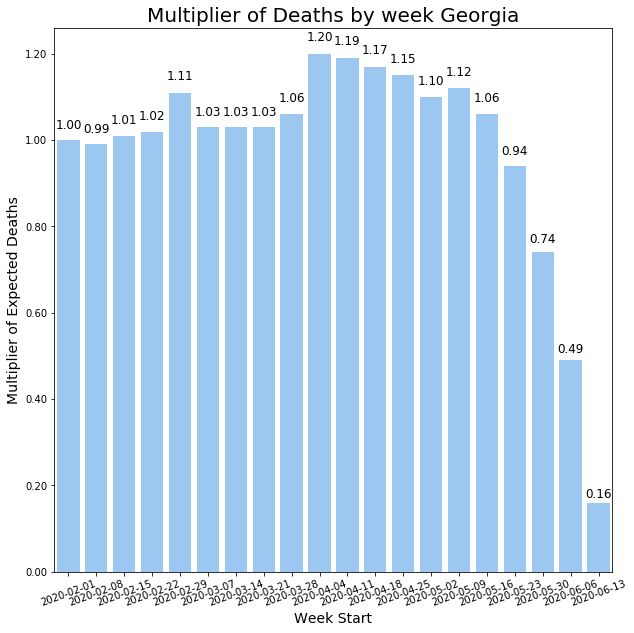

In [80]:
plot_death_bar(results_df,'Georgia',with_multiplier='yes')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x62c1d530>)

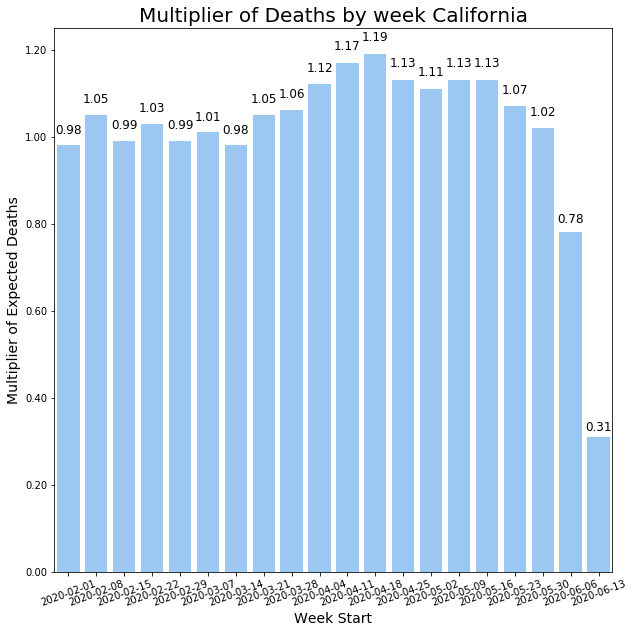

In [81]:
plot_death_bar(results_df,'California',with_multiplier='yes')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x623d7e50>)

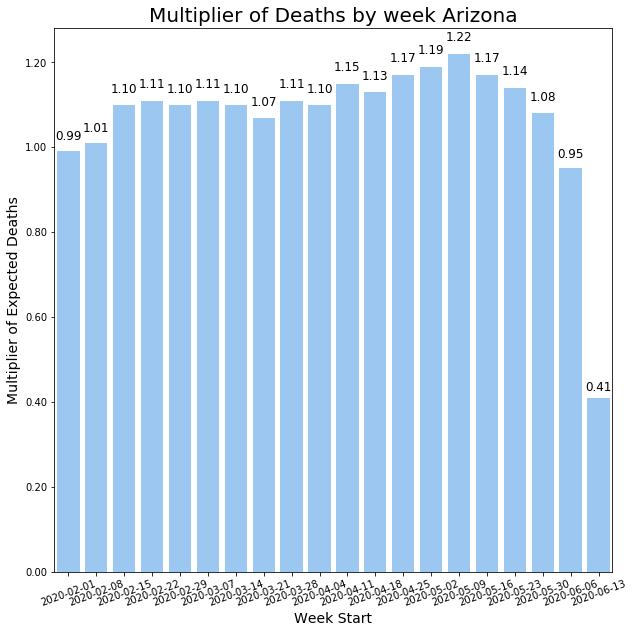

In [82]:
plot_death_bar(results_df,'Arizona',with_multiplier='yes')

In [83]:
results_df.columns

Index(['data_as_of', 'start_week', 'end_week', 'group', 'state', 'indicator',
       'covid_deaths', 'total_deaths', 'percent_of_expected_deaths',
       'pneumonia_deaths', 'pneumonia_and_covid_deaths', 'influenza_deaths',
       'pneumonia_influenza_or_covid_19_deaths', 'footnote'],
      dtype='object')

In [84]:
results_df[results_df['state']=='Georgia'][['start_week','covid_deaths','total_deaths','percent_of_expected_deaths','pneumonia_deaths','influenza_deaths']]

,start_week,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,influenza_deaths
220,2020-02-01,0,1780.0,1.00,87.0,NaN
221,2020-02-08,0,1749.0,0.99,93.0,11.0
222,2020-02-15,0,1742.0,1.01,88.0,16.0
223,2020-02-22,0,1723.0,1.02,80.0,21.0
224,2020-02-29,0,1824.0,1.11,88.0,NaN
225,2020-03-07,NaN,1726.0,1.03,85.0,NaN
226,2020-03-14,NaN,1746.0,1.03,103.0,NaN
227,2020-03-21,36,1728.0,1.03,131.0,NaN
228,2020-03-28,91,1819.0,1.06,151.0,NaN
229,2020-04-04,193,1938.0,1.20,224.0,NaN


In [85]:
results_df.sort_values(by='percent_of_expected_deaths',ascending=False).head(20)

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
690,2020-06-17,2020-04-11,2020-04-11,By week,New York City,Week-ending,4705,7715.0,7.24,2086.0,1793.0,327.0,5008.0,NaN
689,2020-06-17,2020-04-04,2020-04-04,By week,New York City,Week-ending,3084,6065.0,5.89,1711.0,1295.0,211.0,3509.0,NaN
691,2020-06-17,2020-04-18,2020-04-18,By week,New York City,Week-ending,3717,5709.0,5.62,1483.0,1346.0,173.0,3857.0,NaN
692,2020-06-17,2020-04-25,2020-04-25,By week,New York City,Week-ending,2385,3813.0,3.86,1060.0,961.0,78.0,2485.0,NaN
630,2020-06-17,2020-04-11,2020-04-11,By week,New Jersey,Week-ending,2296,4692.0,3.30,1388.0,1150.0,10.0,2537.0,NaN
631,2020-06-17,2020-04-18,2020-04-18,By week,New Jersey,Week-ending,2395,4626.0,3.26,1303.0,1111.0,NaN,2590.0,One or more data cells have counts between 1–9...
632,2020-06-17,2020-04-25,2020-04-25,By week,New Jersey,Week-ending,1848,3774.0,2.77,1109.0,924.0,NaN,2035.0,One or more data cells have counts between 1–9...
688,2020-06-17,2020-03-28,2020-03-28,By week,New York City,Week-ending,958,2778.0,2.70,599.0,360.0,47.0,1205.0,NaN
693,2020-06-17,2020-05-02,2020-05-02,By week,New York City,Week-ending,1360,2475.0,2.46,638.0,553.0,NaN,1447.0,One or more data cells have counts between 1–9...
629,2020-06-17,2020-04-04,2020-04-04,By week,New Jersey,Week-ending,1216,3457.0,2.36,870.0,621.0,10.0,1472.0,NaN


In [86]:
(results_df['start_week']<'2020-05-01').sum()

702

In [87]:
results_df[results_df['state'].isin(['United States'])]

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
0,2020-06-17,2020-02-01,2020-02-01,By week,United States,Week-ending,1,57951.0,0.98,3751.0,0.0,476.0,4228.0,NaN
1,2020-06-17,2020-02-08,2020-02-08,By week,United States,Week-ending,1,58467.0,0.98,3734.0,0.0,514.0,4249.0,NaN
2,2020-06-17,2020-02-15,2020-02-15,By week,United States,Week-ending,0,57753.0,0.98,3758.0,0.0,545.0,4303.0,NaN
3,2020-06-17,2020-02-22,2020-02-22,By week,United States,Week-ending,4,57819.0,0.99,3634.0,1.0,557.0,4194.0,NaN
4,2020-06-17,2020-02-29,2020-02-29,By week,United States,Week-ending,5,58199.0,1.01,3757.0,3.0,637.0,4396.0,NaN
5,2020-06-17,2020-03-07,2020-03-07,By week,United States,Week-ending,32,58461.0,1.01,3890.0,16.0,620.0,4525.0,NaN
6,2020-06-17,2020-03-14,2020-03-14,By week,United States,Week-ending,52,57350.0,1.00,3877.0,27.0,608.0,4509.0,NaN
7,2020-06-17,2020-03-21,2020-03-21,By week,United States,Week-ending,548,57975.0,1.02,4456.0,245.0,540.0,5293.0,NaN
8,2020-06-17,2020-03-28,2020-03-28,By week,United States,Week-ending,3040,61940.0,1.11,6030.0,1372.0,438.0,8086.0,NaN
9,2020-06-17,2020-04-04,2020-04-04,By week,United States,Week-ending,9482,70440.0,1.26,9587.0,4537.0,460.0,14769.0,NaN


In [88]:
results_df['data_as_of'].value_counts()

2020-06-17    1080
Name: data_as_of, dtype: int64

In [89]:
results_df['expected_deaths'] = results_df['total_deaths']/results_df['percent_of_expected_deaths']

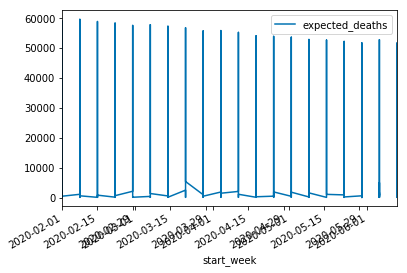

In [90]:
results_df.set_index('start_week')[['expected_deaths','covid_deaths']].plot()

In [91]:
results_df['deaths_over_expected'] = results_df['total_deaths']-results_df['expected_deaths']


In [92]:
final_us_df = pd.melt(results_df[results_df['state']=='United States'],id_vars=['start_week'],value_vars=['covid_deaths','deaths_over_expected'])

In [93]:
final_us_df['value'] = final_us_df['value'].astype(int)

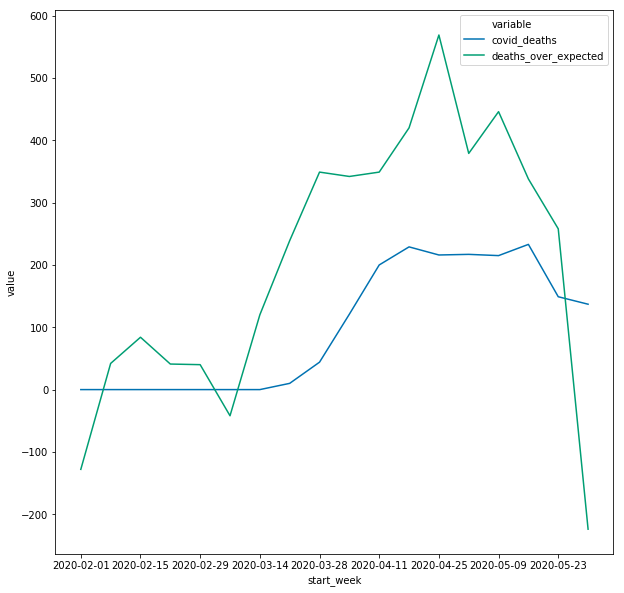

In [94]:
def plot_comp(state):
    final_us_df = pd.melt(results_df[results_df['state']==state].iloc[:-2],id_vars=['start_week'],value_vars=['covid_deaths','deaths_over_expected'])
    final_us_df['value'] = final_us_df['value'].fillna(0).astype(int)
    fig,ax = plt.subplots(figsize=(10,10))
    sns.lineplot(x='start_week',y='value',hue='variable',data=final_us_df,ax = ax)
    ax.set_xticks(final_us_df['start_week'].drop_duplicates()[::2])

plot_comp('Texas')

In [95]:
NY = results_df[results_df['state']=='New York City'].reset_index(drop=True)
NY['start_week'].dt.strftime('%Y-%m-%d')

0     2020-02-01
1     2020-02-08
2     2020-02-15
3     2020-02-22
4     2020-02-29
5     2020-03-07
6     2020-03-14
7     2020-03-21
8     2020-03-28
9     2020-04-04
10    2020-04-11
11    2020-04-18
12    2020-04-25
13    2020-05-02
14    2020-05-09
15    2020-05-16
16    2020-05-23
17    2020-05-30
18    2020-06-06
19    2020-06-13
Name: start_week, dtype: object

/home/pi/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


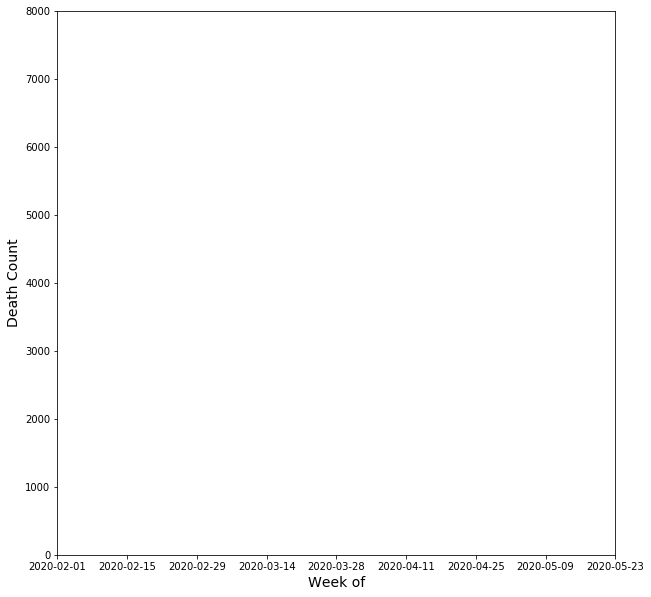

In [96]:
from celluloid import Camera
from IPython.display import HTML

fig,ax = plt.subplots(figsize=(10,10))
camera = Camera(fig)
for i in range(NY.shape[0]-3):
    NY.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
    ax.set_xticklabels(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
    ax.text(0.5,1.05,'Death Count in NYC: Week of {}: {:.0f}'.format(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[i],NY['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
    ax.set_ylabel('Death Count',fontsize=14)
    ax.set_xlabel("Week of",fontsize=14)
    ax.set_ylim(0,8000)
    ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
    camera.snap()
    
animation = camera.animate(interval=1000)
animation.save('weekly_deaths_nyc.mp4')



In [97]:
import os
import subprocess


# subprocess.call('ffmpeg -i weekly_deaths_nyc.mp4 weekly_deaths_nyc.gif',cwd = os.getcwd(),shell=True)
out = subprocess.Popen(['ffmpeg','-y','-i','weekly_deaths_nyc.mp4','weekly_deaths_nyc.gif'],stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
stdout, stderr = out.communicate()
# os.system('ls')
# subprocess.call('echo "I like poratoes"',shell=True)
# stdout

<img src="weekly_deaths_nyc.gif" width="600">

/home/pi/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


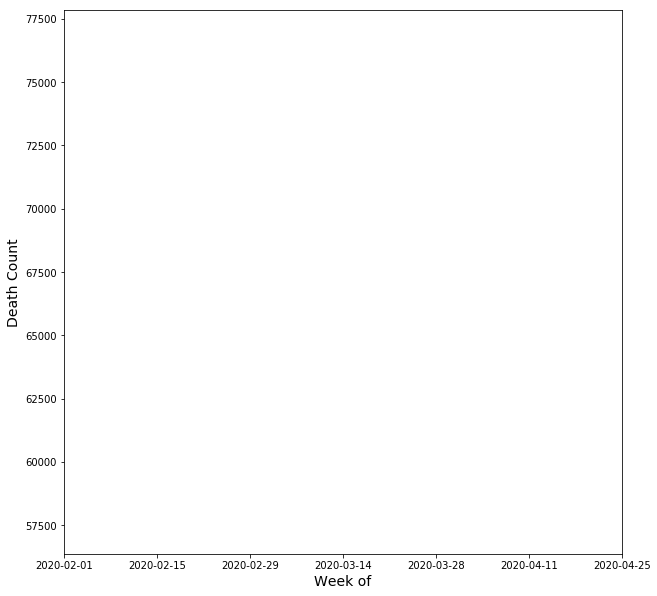

In [98]:
def make_death_gif(results_df,state,max_date='2020-05-01'):
    plot_data = results_df[results_df['state']==state].reset_index(drop=True)
    plot_data['start_week'].dt.strftime('%Y-%m-%d')
    plot_data = plot_data[plot_data['start_week']<max_date].reset_index(drop=True)
    fig,ax = plt.subplots(figsize=(10,10))
    camera = Camera(fig)
    for i in range(plot_data.shape[0]):
        plot_data.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
        ax.set_xticklabels(plot_data['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
        ax.text(0.5,1.05,'Death Count in {}: Week of {}: {:.0f}'.format(state,plot_data['start_week'].dt.strftime('%Y-%m-%d').iloc[i],plot_data['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
        ax.set_ylabel('Death Count',fontsize=14)
        ax.set_xlabel("Week of",fontsize=14)
#         ax.set_ylim(0,8000)
        ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
        camera.snap()

    animation = camera.animate(interval=1000)
    return animation

def make_gif(animation,save_name,debug=False):
    animation.save('test.mp4')
    out = subprocess.Popen(['ffmpeg','-y','-i','test.mp4',save_name],stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout, stderr = out.communicate()
    del_out = subprocess.Popen(['rm','test.mp4'],stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout2, stderr2 = del_out.communicate()
    if debug:
        print("Output of Gif Creation:\n {}\n {}".format(stdout,stderr))
        print("Output of mp4 deletion:\n {}\n {}".format(stdout2,stderr2))
    
ani = make_death_gif(results_df,'United States')
make_gif(ani,'weekly_deaths_us.gif',debug=False)

<img src="weekly_deaths_us.gif" width="600">

In [99]:
county_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [100]:
county_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [101]:
test_df = pd.read_csv('http://coronavirusapi.com/time_series.csv')

In [102]:
test_df['date'].min()

'2020-03-31'

In [103]:
state_df = pd.read_csv('http://coronavirusapi.com/states.csv')

In [104]:
state_df.head()

,"name,",tested,positive,deaths
0,AK,76215,676,12
1,AL,310325,26914,784
2,AR,214403,13191,188
3,AZ,489286,39097,1219
4,CA,2937755,153560,5121


In [105]:
dfs = pd.read_html('http://coronavirusapi.com/')

In [106]:
all_df = dfs[0]

In [107]:
all_df.columns

Index(['State', 'Tested', 'Positive', 'Deaths', 'Tested/1M People',
       'Positive/Tested %', 'Deaths/Positive %', 'Deaths/1M People', 'Source',
       'Last update(hours ago)', 'Population2019 Est*', '10yr AvgDeaths/Day*'],
      dtype='object')

In [108]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
State                     53 non-null object
Tested                    53 non-null int64
Positive                  53 non-null int64
Deaths                    53 non-null int64
Tested/1M People          53 non-null int64
Positive/Tested %         53 non-null float64
Deaths/Positive %         53 non-null float64
Deaths/1M People          53 non-null float64
Source                    52 non-null object
Last update(hours ago)    53 non-null float64
Population2019 Est*       53 non-null int64
10yr AvgDeaths/Day*       53 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 4.6+ KB


In [109]:
states_to_annotate = ['USA','DC','LA','CO','WA','MI','IL','NJ','NY']

In [110]:
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [111]:
region_dict = regions.set_index('State Code')['Region'].to_dict()

In [112]:
all_df['Region'] = all_df['State'].map(region_dict).fillna('USA')

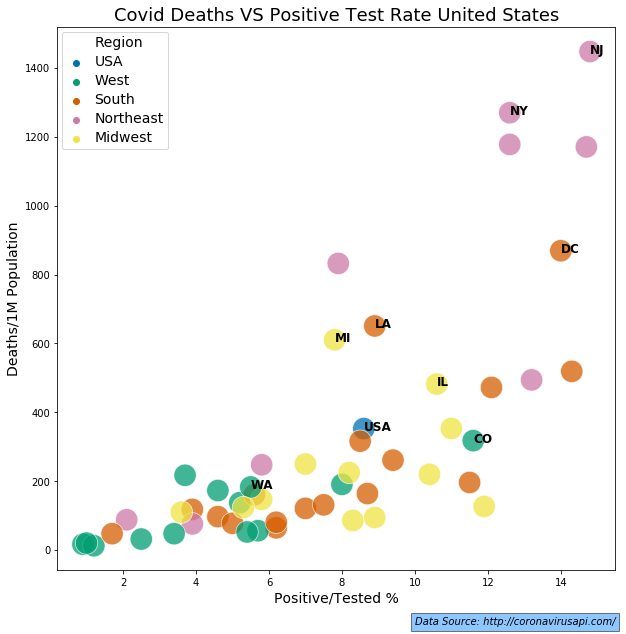

In [113]:

def plot_testing_v_death(all_df,annotate=[],ax=False):
    if ax:
        has_ax = True
    else:
        has_ax=False
    all_df['color'] = all_df['State'].apply(lambda x: 'orangered' if x in annotate else 'dodgerblue')
    all_df['size'] = all_df['Tested'].apply(lambda x: (x/10000))
#     all_df['alpha'] = all_df['State'].apply(lambda x: 1 if x in annotate else .75)
    plt.style.use('seaborn-colorblind')
    if not has_ax:
        fig,ax=plt.subplots(figsize=(10,10))
    else:
        fig = ax.get_figure()
#     ax.scatter(all_df['Positive/Tested %'],y=all_df['Deaths/1M People'],c=all_df['region'],s = all_df['size'],alpha=.75)
    sns.scatterplot(x='Positive/Tested %',y='Deaths/1M People',hue='Region',s=500,data=all_df[all_df['State']!='PR'],ax=ax,alpha=0.75)
    ax.set_title("Covid Deaths VS Positive Test Rate United States",fontsize=18)
    ax.set_xlabel('Positive/Tested %',fontsize=14)
    ax.set_ylabel("Deaths/1M Population",fontsize=14)
    ax.grid(False)
    for state in annotate:
        coords = all_df[all_df['State']==state][['Positive/Tested %','Deaths/1M People']].values[0]

        xycoords = (coords[0],coords[1]-5)
        ax.annotate(state,(coords[0],coords[1]),xytext=xycoords,fontweight='bold',fontsize=12)
    plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
    ax.text(1,-.1,'Data Source: http://coronavirusapi.com/',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)

    return fig,ax

fig,ax = plot_testing_v_death(all_df,states_to_annotate)


fig.savefig('covid_test_rate.png')

In [114]:
import datetime
time_df = all_df.copy()
time_df.head()
time_df['date'] = datetime.datetime.now()

In [115]:
time_df.head()

,State,Tested,Positive,Deaths,Tested/1M People,Positive/Tested %,Deaths/Positive %,Deaths/1M People,Source,Last update(hours ago),Population2019 Est*,10yr AvgDeaths/Day*,Region,color,size,date
0,USA,24764008,2129219,110035,79387,8.6,5.2,352.7,NaN,4.3,328239523,6754,USA,orangered,2476.4008,2020-06-17 16:45:29.813495
1,AK,76215,676,12,107310,0.9,1.8,16.9,AK,16.2,731545,11,West,dodgerblue,7.6215,2020-06-17 16:45:29.813495
2,AL,310325,26914,784,64925,8.7,2.9,164.0,AL,4.3,4903185,130,South,dodgerblue,31.0325,2020-06-17 16:45:29.813495
3,AR,214403,13191,188,73528,6.2,1.4,64.5,AR,14.6,3017804,78,South,dodgerblue,21.4403,2020-06-17 16:45:29.813495
4,AZ,489286,39097,1219,76546,8.0,3.1,190.7,AZ,14.6,7278717,136,West,dodgerblue,48.9286,2020-06-17 16:45:29.813495


In [116]:
ca_df = 

SyntaxError: invalid syntax (<ipython-input-116-d1cf35780939>, line 1)

In [ ]:
# fig,ax=plt.subplots(15,15)
# sns.barplot(x='State',y='Tested',hue='Region',data=all_df[all_df['State']!='PR'],ax=ax)

In [ ]:
# def plot_testing_vs_size(all_df,annotate=[]):
    
#     all_df['color'] = all_df['State'].apply(lambda x: 'orangered' if x in annotate else 'dodgerblue')
#     all_df['size'] = all_df['Positive/Tested %'].apply(lambda x: (x*10))

# #     all_df['size'] = all_df['State'].apply(lambda x: 80 if x in annotate else 500)
# #     all_df['alpha'] = all_df['State'].apply(lambda x: 1 if x in annotate else .75)
#     plt.style.use('seaborn-colorblind')
#     fig,ax=plt.subplots(figsize=(10,10))
# #     ax.scatter(all_df['Positive/Tested %'],y=all_df['Deaths/1M People'],c=all_df['region'],s = all_df['size'],alpha=.75)
#     sns.scatterplot(x='Tested/1M People',y='Deaths/1M People',hue='Region',data=all_df[all_df['State']!='PR'],ax=ax,alpha=0.75)
#     ax.set_title("Covid Deaths VS Testing Positivity Rate by State",fontsize=18)
#     ax.set_xlabel('Tested/1M People',fontsize=14)
#     ax.set_ylabel("Deaths/1M Population",fontsize=14)
#     ax.grid(False)
#     for state in annotate:
#         coords = all_df[all_df['State']==state][['Tested','Deaths/1M People']].values[0]

#         xycoords = (coords[0],coords[1]-5)
#         ax.annotate(state,(coords[0],coords[1]),xytext=xycoords,fontweight='bold',fontsize=12)
#     plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
#     ax.text(1,-.1,'Data Source: http://coronavirusapi.com/',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)

#     return fig,ax
# plot_testing_vs_size(all_df,states_to_annotate)

In [ ]:
all_df.sort_values(by='size',ascending=False)

In [ ]:
all_df.head()

In [ ]:
all_df.head()

In [ ]:
county_data.head()

In [ ]:
import geopandas as gpd

geo_df = gpd.read_file('./shape_files/cb_2018_us_county_500k.shp')

In [ ]:
geo_df['fips'] = geo_df['GEOID'].astype(float)

In [ ]:
final_geo_df = county_data.merge(geo_df,how='left',on='fips')

In [ ]:
final_geo_df.head()

In [ ]:
final_geo_df = final_geo_df[~final_geo_df['state'].isin(['Hawaii','Alaska','Puerto Rico'])].reset_index(drop=True)

In [ ]:
day_list = final_geo_df['date'].unique().tolist()[11:]


In [ ]:
import mapclassify
import numpy as np

scheme = mapclassify.NaturalBreaks(final_geo_df['cases'],k=5)


In [ ]:
final_geo_df.dropna(inplace=True)


In [ ]:
import geoplot
import geoplot.crs as gcrs
from celluloid import Camera
from IPython.display import HTML
# contiguous_usa = gpd.read_file(geoplot.datasets.get_path('contiguous_usa'))
# ax3 = geoplot.webmap(contiguous_usa,projection=gcrs.WebMercator(),figsize=(15,10))
# fig3 = ax3.get_figure()
# camera = Camera(fig3)
# for day in day_list[::5]:
#     print(day)
#     geoplot.webmap(contiguous_usa,projection=gcrs.WebMercator(),ax=ax3)

#     test_geo = gpd.GeoDataFrame(final_geo_df[final_geo_df['date']==day])
#     geoplot.choropleth(
#     test_geo, hue='cases', 
#     cmap='Reds', ax = ax3, edgecolor=None,scheme = scheme,legend=True, legend_kwargs={'bbox_to_anchor':(.9,.2)}
#  )
#     ax3.text(0.5,1,'Total Covid Cases by Country: {}'.format(day),fontsize=20,horizontalalignment='center',transform = ax3.transAxes)
# #     ax3.axis('off')
    
#     camera.snap()
# animation = camera.animate(interval=500)
# HTML(animation.to_html5_video())


In [ ]:
# NY = results_df[results_df['state']=='New York City'].reset_index(drop=True)
# NY.head()

In [ ]:
# NY['start_week'].dt.strftime('%Y-%m-%d')

In [ ]:
# fig,ax = plt.subplots(figsize=(10,10))
# camera = Camera(fig)
# for i in range(NY.shape[0]):
#     NY.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
#     ax.set_xticklabels(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
#     ax.text(0.5,1.05,'Death Count in NYC: Week of {}: {:.0f}'.format(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[i],NY['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
#     ax.set_ylabel('Death Count',fontsize=14)
#     ax.set_xlabel("Week of",fontsize=14)
#     ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
#     camera.snap()
    
# animation = camera.animate(interval=500)
# animation.save('weekly_deaths_nyc.mp4')

# HTML(animation.to_html5_video())
